In [1]:
#########################
###  Import Thingies  ###
#########################

import numpy as np
import math
from math import cos
from math import sin
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import os
import re
from tqdm import tqdm
import scipy
from scipy import ndimage
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import shift
#%matplotlib inline
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
from moviepy.editor import *
#from PIL import Image
#from glob import glob






In [6]:
#####################
###  Import Data  ###
#####################


date_folder = '20190327'
experiment = 'dickinson_pilot_10cm'

genotype = 'gr5a-chrimsonvk'  
condition = '10cm foodspots'




Path = 'Z:/data/Ashley2/foraging/' + str(experiment)+ '/'
#Path = 'Z:/data/Ashley2/foraging/' + str(date_folder) + '/' + str(experiment) + '/'
SavePath = 'C:/Users/ashsm/Documents/Stanford/foraging project-dickinson pilot/' + str(condition) + '-graphs/'

if os.path.exists(SavePath):
    print('folder there')
else:
    os.makedirs(SavePath)
    

    
print(Path)
dirNames = os.listdir(Path)

print(dirNames)




folder there
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/
['metadata-090720.txt', 'metadata-112211.txt', 'metadata-113018.txt', 'metadata-113049.txt', 'metadata-113653.txt', 'metadata-114407.txt', 'metadata-132108.txt', 'trial-1-20190815-113502-113018', 'trial-1-20190815-113940-113653', 'trial-1-20190816-112228-112211', 'trial-1-20190816-113413-113049', 'trial-1-20190816-132247-132108', 'trial-1-20190821-090829-090720', 'trial-10-20190815-122813-113653', 'trial-11-20190815-123317-113653', 'trial-12-20190815-123513-113653', 'trial-13-20190815-124059-113653', 'trial-14-20190815-124806-113653', 'trial-2-20190815-113519-113018', 'trial-2-20190815-114349-113653', 'trial-2-20190816-112446-112211', 'trial-2-20190816-133646-132108', 'trial-3-20190815-114725-113653', 'trial-3-20190816-121934-114407', 'trial-3-20190816-134546-132108', 'trial-4-20190815-115456-113653', 'trial-4-20190816-135004-132108', 'trial-5-20190815-120041-113653', 'trial-5-20190816-135622-132108', 'trial-6-20190815-120507-

In [7]:
class Trial:
    def __init__ (self, dirName):
        #this sets up the path (fname) and calls the following classes
        self.cam = Cam(os.path.join(dirName, 'cam.txt'))
        self.cnc = Cnc(os.path.join(dirName, 'cnc.txt'))
        
        if os.path.exists(os.path.join(dirName, 'opto.txt')): #in case there is no opto file
            self.opto = Opto(os.path.join(dirName, 'opto.txt'))
        
class Cam:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))
        #self.pvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,), dtype=bool)
        self.avec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(3,))

class Cnc:
    def __init__ (self, fname):
        print(fname)
        self.tvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(0,))
        self.xvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(1,))
        self.yvec = np.genfromtxt(fname, delimiter=',',skip_header=1,usecols=(2,))
        
class Opto:
    def __init__ (self, fname):
        print(fname)
        #instead of genfromtext use a line by line reader
        with open(fname) as f:
            lines = f.read().split('\n')
            
            self.optodata = []
            self.label = []
            self.xfood = []
            self.yfood = []
            self.foodtime = []
            self.ledtime = []
            self.ledstatus = []
            for i in range(len(lines)):
                new_line = lines[i].split(',')  #split up each element in a line 
                self.optodata.append(new_line)
                self.label.append(new_line[0])
                if self.label[i] == 'food':  #make food lists
                    self.foodtime.append(float(new_line[1]))  #need to convert strings to floats
                    self.xfood.append(float(new_line[2]))
                    self.yfood.append(float(new_line[3]))
                if self.label[i] == 'led': # make led lists
                    self.ledtime.append(float(new_line[1]))
                    self.ledstatus.append(new_line[2])



## For importing files in correct order:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [tryint(c) for c in re.split('([0-9]+)', s)]

def sort_nicely(x):
    x.sort(key=alphanum_key)


dirNames = [x for x in dirNames if 'trial' in x]
sort_nicely(dirNames)

trials = ([Trial(os.path.join(Path, dirName)) for dirName in dirNames])

print(trials)

#get metadata
metafname = os.path.join(Path, 'metadata.txt')
if os.path.exists(metafname): #in case there is no metadata
    with open(metafname) as f:
        metadata = f.read()
else: metadata = 'Not Specified' #so I can still add to dictionary
print(metadata)


Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113502-113018\cam.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113502-113018\cnc.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113502-113018\opto.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113940-113653\cam.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113940-113653\cnc.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190815-113940-113653\opto.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816-112228-112211\cam.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816-112228-112211\cnc.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816-112228-112211\opto.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816-113413-113049\cam.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816-113413-113049\cnc.txt
Z:/data/Ashley2/foraging/dickinson_pilot_10cm/trial-1-20190816

In [10]:
#################################################
### Create fly class and pull from trial data ###
#################################################

class Fly:
    def __init__ (self,trial,time_res=0.01,sigma=0):
        if np.any(trial.cam.xvec):  #xvec was pvec before
            # Get cam data (only time points where pvec is true, aka fly is present)
            #there is no longer an indicator if the fly is there
            #camt = trial.cam.tvec[trial.cam.pvec]
            camt = trial.cam.tvec
            #Interpolate
#             cama = interp1d(camt, trial.cam.avec[trial.cam.pvec],kind='nearest')
#             camx = interp1d(camt, trial.cam.xvec[trial.cam.pvec])
#             camy = interp1d(camt, trial.cam.yvec[trial.cam.pvec])
            cama = interp1d(camt, trial.cam.avec,kind='nearest')
            camx = interp1d(camt, trial.cam.xvec)
            camy = interp1d(camt, trial.cam.yvec)
            # Get cnc data
            cncx = interp1d(trial.cnc.tvec, trial.cnc.xvec)
            cncy = interp1d(trial.cnc.tvec, trial.cnc.yvec)
            tmin = max(camt[0], trial.cnc.tvec[0])
            tmax = min(camt[-1], trial.cnc.tvec[-1])
            
            # Pull from interpolated data at chosen time resolution, and add camera and cnc positions
            self.t = np.arange(tmin, tmax, time_res)
            self.x = camx(self.t) + cncx(self.t)
            self.y = camy(self.t) + cncy(self.t)
            self.a = cama(self.t)
            # Unwrap angles and rotate
            self.angleUnwrapper()
            #self.a=angleChangeOrigin(self.a)
            self.a = 90-self.a #rotate angles 90deg to change ellipse fitting defined angles
            #self.a = self.a+90 #flip angle horizontally due to camera flip
            # Smooth if asked to
            if sigma is not 0:
                self.x = scipy.ndimage.filters.gaussian_filter1d(self.x,sigma)
                self.y = scipy.ndimage.filters.gaussian_filter1d(self.y,sigma)
                self.a = scipy.ndimage.filters.gaussian_filter1d(self.a,sigma)
            self.tvid = self.t - camt[0] #for video debugging
            self.velocity()
            
##-----> ADD IF CONDITION HERE IN CASE THERE IS NO OPTO
        elif np.any(trial.opto.xfood):
            self.optofoodx = trial.opto.xfood
            self.optofoody = trial.opto.yfood
            self.ledtime = trial.opto.ledtime # probably should not be the same name--fix later
            
        else:
            self.t = None
            self.x = None
            self.y = None
            self.a = None
            self.v = None
            self.tvid = None    
#             self.optofoodx = None
#             self.optofoody = None
#             self.ledtime = None
    def angleUnwrapper(self):
        jumpThresh=150
        angles=[]
        angle_offset=0
        for k, angle in enumerate(self.a):
            if k == 0:
                angles.append(angle)
                continue
            angle += angle_offset
            if angles[-1]-angle > jumpThresh:
                angle_offset += 180
                angle += 180
            elif angle-angles[-1] > jumpThresh:
                angle_offset -= 180
                angle -= 180
            angles.append(angle)
        self.a = np.array(angles)
    def velocity(self):
        x1 = self.x
        y1 = self.y
        a1 = self.a
        x2 = shift(x1,-1,cval=np.NaN)
        y2 = shift(y1,-1,cval=np.NaN)
        a2 = shift(a1,-1,cval=np.NaN)
        # Calculate velocity
        dist = (((x2-x1)**2)+((y2-y1)**2))**0.5
        self.v = dist[:-2]
#         # Calculate angle of velocity
#         angle = np.rad2deg(np.arctan2((y2-y1),(x2-x1))%(2*np.pi)) 
#         angle = angle[:-2]
        # Calculate angular velocity
        angular_velocity = a2-a1
        self.av = angular_velocity[:-2]

class FlyArrow:
    def __init__ (self,fly,scale,flip=False):
        if np.any(fly.x):
            if flip is True:
                fly.a = fly.a + 180
            self.x1 = fly.x+np.cos(fly.a*np.pi/180)*scale
            self.x2 = fly.x-np.cos(fly.a*np.pi/180)*scale
            self.y1 = fly.y-np.sin(fly.a*np.pi/180)*scale
            self.y2 = fly.y+np.sin(fly.a*np.pi/180)*scale
        else:
            self.x1 = None
            self.x2 = None
            self.y1 = None
            self.y2 = None            



[0.35775791 0.35775359 0.35774479 ... 0.49687721 0.49687721 0.49687722]


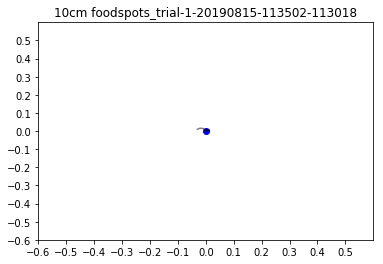

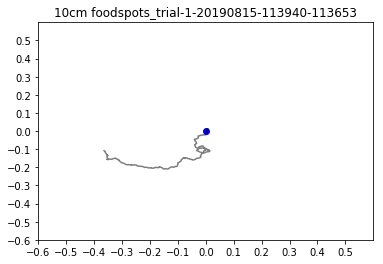

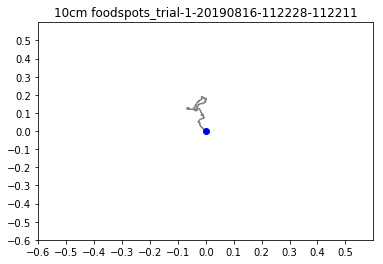

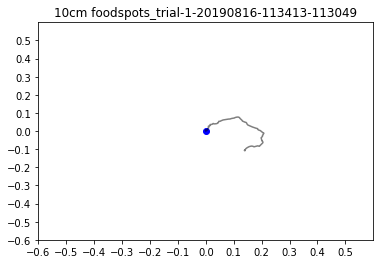

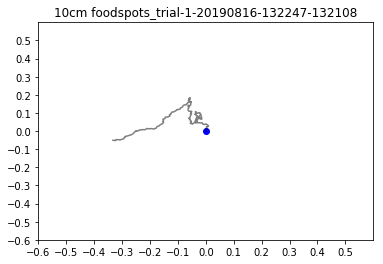

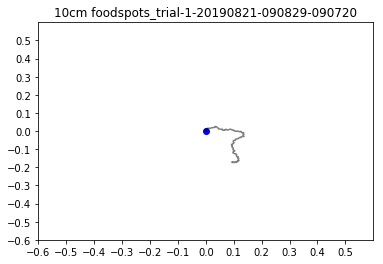

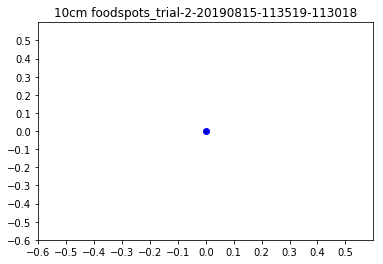

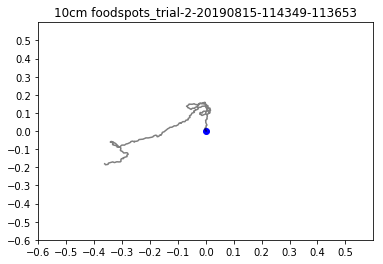

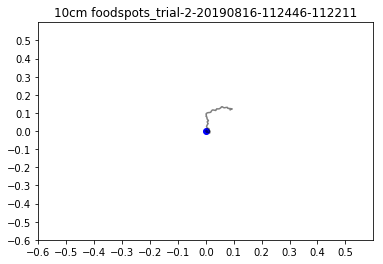

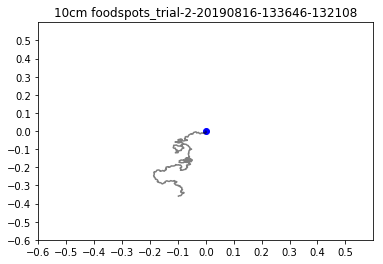

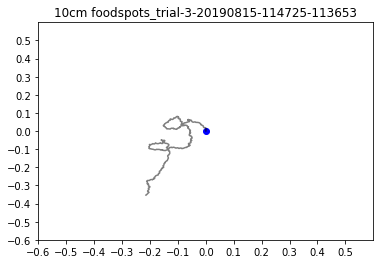

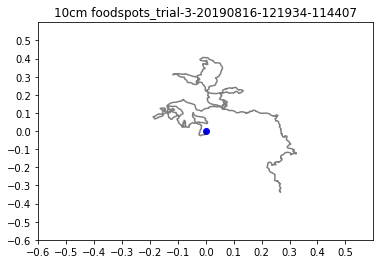

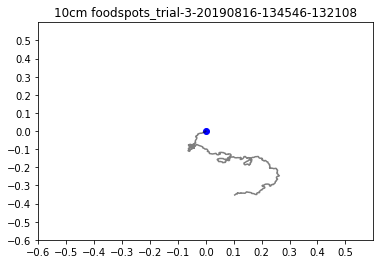

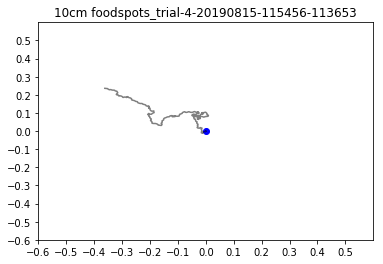

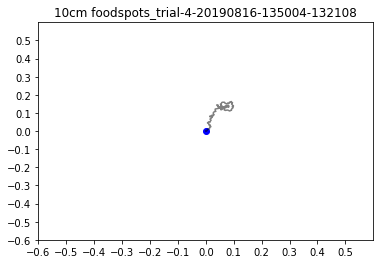

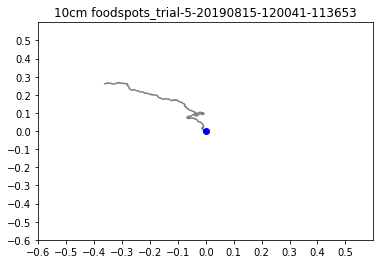

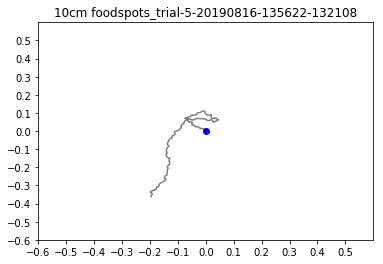

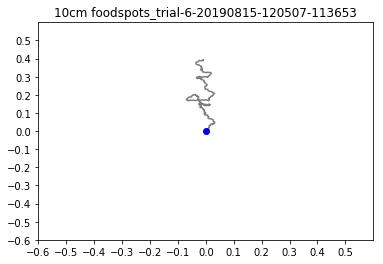

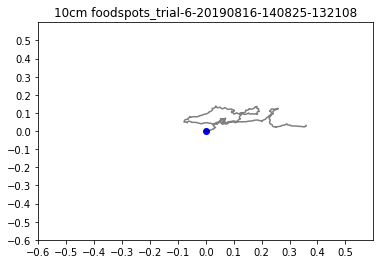

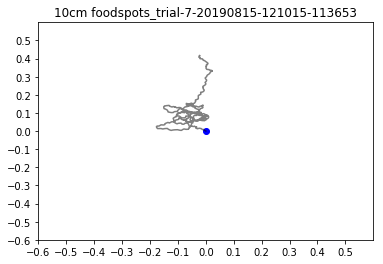

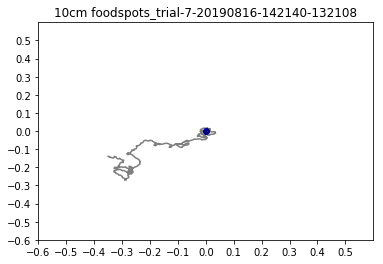

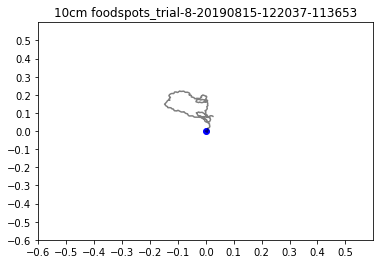

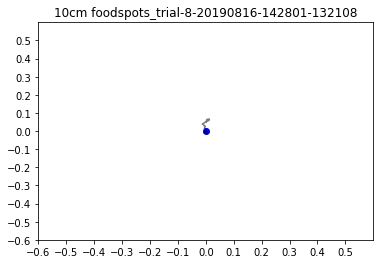

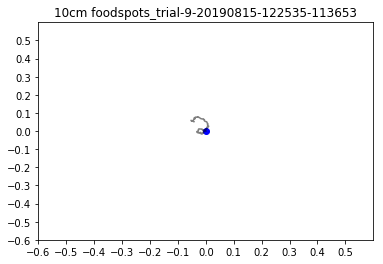

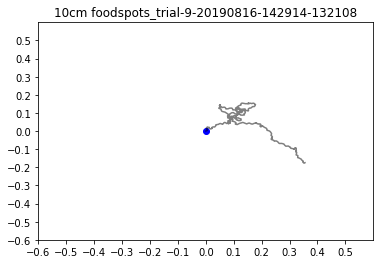

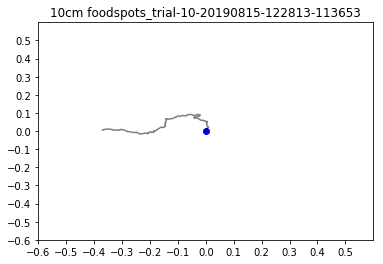

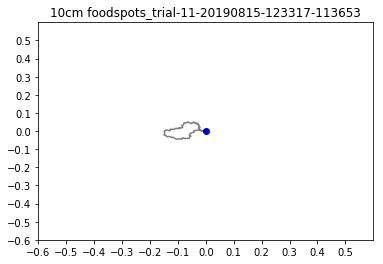

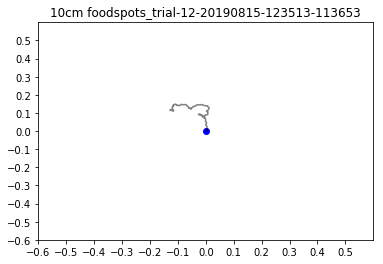

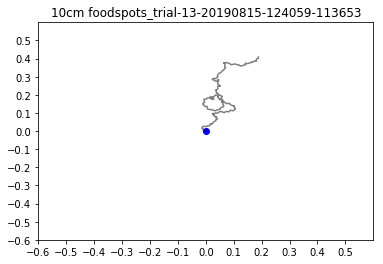

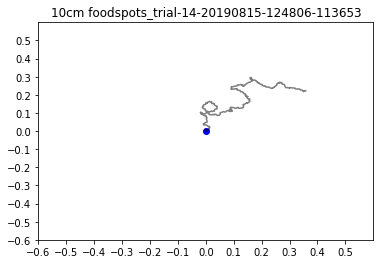

In [11]:
######   MAKE INIDIVIDUAL LINE PLOTS

#plot lines of trajectories and scatter foodspots
flies = [Fly(trial, sigma=3) for trial in trials]
print(flies[3].x)
for fly_index in range(len(flies)): 
    if flies[fly_index].x is not None: 
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        plt.xlim(-.6,.6)
        plt.ylim(-.6,.6)
        plt.yticks(np.arange(-.6,.6, step = .1))
        plt.xticks(np.arange(-.6,.6, step = .1))
        centerx = flies[fly_index].x[0]
        centery = flies[fly_index].y[0]
        plt.plot(flies[fly_index].x - centerx, flies[fly_index].y-centery, color = 'black', alpha = .5)
        plt.title(str(condition)+ '_' + str(dirNames[fly_index]))
        #plt.scatter(flies[fly_index].optofoodx-centerx, flies[fly_index].optofoody-centery, s = 70, color = 'red', alpha = .5)
        plt.scatter(0, 0, color = 'blue')

    fig1.savefig(os.path.join(SavePath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'fly ' + str(fly_index + 1) + 'PATH.png'))
    plt.show()





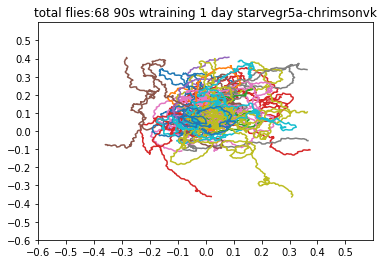

In [17]:
######   MAKE LINE PLOTS OVERLAY

#plot lines of trajectories and scatter foodspots
flies = [Fly(trial, sigma=3) for trial in trials]
fig1 = plt.figure()
for fly_index in range(len(flies)):     
    if flies[fly_index].x is not None:
        #ax1 = fig1.add_subplot(111)
        plt.xlim(-.6,.6)
        plt.ylim(-.6,.6)
        plt.yticks(np.arange(-.6,.6, step = .1))
        plt.xticks(np.arange(-.6,.6, step = .1))
        centerx = flies[fly_index].x[0]
        centery = flies[fly_index].y[0]
        plt.plot(flies[fly_index].x - centerx, flies[fly_index].y-centery)

        #plt.scatter(flies[fly_index].optofoodx-centerx, flies[fly_index].optofoody-centery, s = 70, color = 'red', alpha = .5)
        plt.scatter(0, 0, color = 'blue')
plt.title('total flies:' + str(fly_index+1) + ' ' + str(condition) + str(genotype))    
# fig1.savefig(os.path.join(SavePath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'fly ' + str(fly_index + 1) + 'OVERLAY-PATHs.png'))
plt.show()




In [18]:
#calculate total distance travelled (using euclidian distance)
#euclidian distance between two points and then add to runnning sum
appended_total_distances = []

flies = [Fly(trial, sigma=3) for trial in trials]
for fly_index in range(len(flies)):  
    if flies[fly_index].x is not None:
        #for each fly, loop through all the positions. calculate the euc distance between the first and second and then second and third, etc
        #and sum
        #can I do this with slicing? is that what it is called? []-[]-1
        #[begin:end:stride] end is exclusive so if you want to include item #n write n+1. -1 is second to last

        #have the distances be adjusted so the first position = 0,0
        adj_x_positions = np.array(flies[fly_index].x) - flies[fly_index].x[0]
        adj_y_positions = np.array(flies[fly_index].y) - flies[fly_index].y[0]

        #calculate euclidian distance between each two points
        intermediate_distances_array = np.sqrt((abs(adj_x_positions[:-1]) - abs(adj_x_positions[1:]))**2 +
                                              (abs(adj_y_positions[:-1]) - abs(adj_y_positions[1:]))**2)
        #sum all of the distances
        total_distance = np.sum(intermediate_distances_array)
        appended_total_distances.append(total_distance)
    
    
print(appended_total_distances)

#save distances

distancesPath = SavePath + "/distances/"
if os.path.exists(distancesPath):
    print('folder there')
else:
    os.makedirs(distancesPath)
# np.savetxt(os.path.join(distancesPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'total_distances_somewithoutfoodspots.csv'), appended_total_distances)

[0.837529035352456, 0.3777435829620893, 0.47026025344116384, 4.340102234513967, 0.9734093092509485, 0.6904013785007795, 3.5493825755482797, 1.5239177467168978, 1.7088457330265423, 0.4769548897849286, 1.6810861317945307, 0.8927141049538346, 0.9957877564903406, 1.84299519866483, 1.4615737368992348, 3.6357315478047205, 7.14665168908377, 1.2969327004341185, 0.9099356670400279, 1.08786988445615, 1.9510292650871128, 1.251837998209655, 1.4242192460911545, 1.8987477177376453, 0.6535424608973269, 2.191103180781226, 2.0621223406697577, 1.4076408964611864, 9.64953145754644, 4.61888562061508, 1.3920167486749413]


[155.85985136032104, 115.96988940238953, 125.46988034248352, 905.3691365718842, 246.849764585495, 149.82985711097717, 452.23956871032715, 262.12975001335144, 349.7096664905548, 94.55990982055664, 320.50969433784485, 300.3697135448456, 229.84978079795837, 230.96977972984314, 627.6994013786316, 310.5797038078308, 911.6991305351257, 160.21984720230103, 169.4898383617401, 346.7896692752838, 220.77978944778442, 446.46957421302795, 309.9397044181824, 342.8296730518341, 156.70985054969788, 349.0396671295166, 248.72976279258728, 1079.558970451355, 1031.0290167331696, 623.3194055557251, 397.18962121009827]


<BarContainer object of 31 artists>

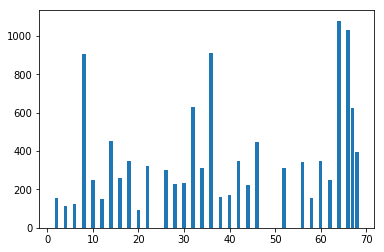

In [19]:
#total time
appended_total_durations = []
fly_index_appended = []
flies = [Fly(trial, sigma=3) for trial in trials]
for fly_index in range(len(flies)):
    if flies[fly_index].x is not None:
        duration = []
        duration = flies[fly_index].t[-1]-flies[fly_index].t[0]
        appended_total_durations.append(duration)
        fly_index_appended.append(fly_index+1)
print(appended_total_durations)

#save distances

durationsPath = SavePath + "/durations/"
if os.path.exists(durationsPath):
    print('folder there')
else:
    os.makedirs(durationsPath)
# np.savetxt(os.path.join(durationsPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'total_durations_somewithoutfoodspots.csv'), appended_total_durations)

plt.bar(fly_index_appended, appended_total_durations)

[0.3189257496853259, 0.12443462741219112, 0.24230677083837493, 0.3822740847842224, 0.16759335655989263, 0.222060090461979, 0.2533911862006836, 0.4800894611028586, 0.4305008954814518, 0.12666244302616453, 0.18683398840103305, 0.25586444506019557, 0.31260299325985097, 0.38730238608169987, 0.4159171005562975, 0.49496405326325077, 0.31311126932716843, 0.3697101216707152, 0.40054270384251595, 0.18237565769051434, 0.377996520204371, 0.37178006636981276, 0.21891692771391946, 0.36180733607495735, 0.2903944541845403, 0.43108741843981013, 0.34997075218307133, 0.5003420959306556, 0.47602376875905744, 0.41394607609333434, 0.14354815092648773]
folder there


<BarContainer object of 31 artists>

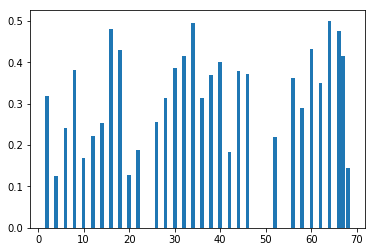

In [20]:
#furthest point from center
#straight line from center to point out (not path walked)
    #1. calculate distance from center for all points
    #2. find max value
appended_furthest_point = []
fly_index_appended = []
flies = [Fly(trial, sigma=3) for trial in trials]
for fly_index in range(len(flies)): 
    if flies[fly_index].x is not None:
        #euclidian distances from center and find max

        #have the distances be adjusted so the first position = 0,0
        adj_x_positions = np.array(flies[fly_index].x) - flies[fly_index].x[0]
        adj_y_positions = np.array(flies[fly_index].y) - flies[fly_index].y[0]

        #calculate euclidian distance between each two points
        intermediate_distances_array = np.sqrt((abs(adj_x_positions[:-1]) -0)**2 +
                                              (abs(adj_y_positions[:-1]) - 0)**2)
        #find max distance
        max_distance = np.max(intermediate_distances_array)
        appended_furthest_point.append(max_distance)

        fly_index_appended.append(fly_index+1)
    
print(appended_furthest_point)

#save distances

distancesPath = SavePath + "/distances/"
if os.path.exists(distancesPath):
    print('folder there')
else:
    os.makedirs(distancesPath)
# np.savetxt(os.path.join(distancesPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'furthest_point_from_center_somewithoutfoodspots.csv'), appended_furthest_point)



plt.bar(fly_index_appended, appended_furthest_point)

[0.12443463 0.12666244 0.14354815 0.16759336 0.18237566 0.18683399
 0.21891693 0.22206009 0.24230677 0.25339119 0.25586445 0.29039445
 0.31260299 0.31311127 0.31892575 0.34997075 0.36180734 0.36971012
 0.37178007 0.37799652 0.38227408 0.38730239 0.4005427  0.41394608
 0.4159171  0.4305009  0.43108742 0.47602377 0.48008946 0.49496405
 0.5003421 ]


<BarContainer object of 31 artists>

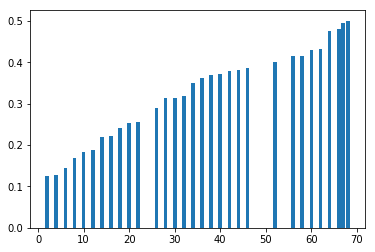

In [21]:
sorted_appended_furthest_point = np.sort(appended_furthest_point)

print(sorted_appended_furthest_point)
plt.bar(fly_index_appended, sorted_appended_furthest_point)

('fly index with fewer than 2 foodspots', 1)
('fly index with fewer than 2 foodspots', 3)
('fly index with fewer than 2 foodspots', 5)
('fly index with more than one foodspot', 7)
('fly index with more than one foodspot', 9)
('fly index with fewer than 2 foodspots', 11)
('fly index with more than one foodspot', 13)
('fly index with more than one foodspot', 15)
('fly index with more than one foodspot', 17)
('fly index with fewer than 2 foodspots', 19)
('fly index with more than one foodspot', 21)
('fly index with more than one foodspot', 25)
('fly index with more than one foodspot', 27)
('fly index with more than one foodspot', 29)
('fly index with more than one foodspot', 31)
('fly index with more than one foodspot', 33)
('fly index with more than one foodspot', 35)
('fly index with fewer than 2 foodspots', 37)
('fly index with fewer than 2 foodspots', 39)
('fly index with more than one foodspot', 41)
('fly index with more than one foodspot', 43)
('fly index with more than one foodspot

<BarContainer object of 31 artists>

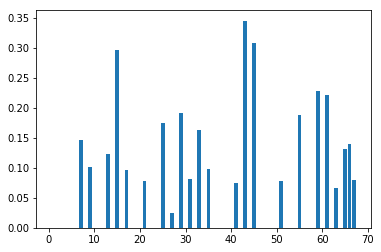

In [23]:
##distance between foodspots
#the direct distance between two foodspots NOT the path the fly took

flies = [Fly(trial, sigma=3) for trial in trials]
distances_between_foodspots_appended = []
fly_index_appended = []
mean_distances_appended = []
for fly_index in range(len(flies)):
    if flies[fly_index].x is not None:
        if len(flies[fly_index].optofoodx) > 1:
            print('fly index with more than one foodspot', fly_index)
            center_x = flies[fly_index].x[0]
            center_y = flies[fly_index].y[0]

            adj_optox_positions = np.array(flies[fly_index].optofoodx) - center_x
            adj_optoy_positions = np.array(flies[fly_index].optofoody) - center_y

            #calculate euclidian distance between each two points
            intermediate_distances_array = np.sqrt((abs(adj_optox_positions[:-1]) - abs(adj_optox_positions[1:]))**2 +
                                                  (abs(adj_optoy_positions[:-1]) - abs(adj_optoy_positions[1:]))**2)
            #calculate mean
            mean_distances = np.mean(intermediate_distances_array)

        #if there are no foodspots
        else: 
            print('fly index with fewer than 2 foodspots', fly_index)
            intermediate_distances_array = np.array([0])
            #calculate mean
            mean_distances = np.mean(intermediate_distances_array)

        #append the arrays of distances
        distances_between_foodspots_appended.append(intermediate_distances_array)
        fly_index_appended.append(fly_index)
        mean_distances_appended.append(mean_distances)

print(distances_between_foodspots_appended)
print(len(distances_between_foodspots_appended))
#print(np.shape(distances_between_foodspots_appended))
print(distances_between_foodspots_appended[2])


distances_between_foodspots_appended = np.array(distances_between_foodspots_appended)
print(fly_index_appended)
print(mean_distances_appended)

# header_video_info = ['date', 'video-number', 'framerate', 'threshold', 'interval-length', 'probe-length', '#light-pulses', '#probe-trials', 'length of video']
# video_name = str(video).strip('[]')
# video_info = [date, video_name, framerate, smoothed_threshold, light_interval_time, probe_length_time, number_of_pulses, number_probe_trials, length_video]
# all_video_info = [header_video_info, video_info]
# np.savetxt(os.path.join(videoinfopath, date + str(video).strip('[]') + 'all_video_info.txt'), all_video_info, fmt='%s')


foodspotsPath = SavePath + "/foodspots/"
if os.path.exists(foodspotsPath):
    print('folder there')
else:
    os.makedirs(foodspotsPath)


# np.savetxt(os.path.join(foodspotsPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'distance_between_foodspots.csv'), distances_between_foodspots_appended,  fmt='%s', delimiter = ',')
# np.savetxt(os.path.join(foodspotsPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'mean_distance_between_foodspots.csv'), mean_distances_appended,  fmt='%s', delimiter = ',')

plt.bar(fly_index_appended, mean_distances_appended)

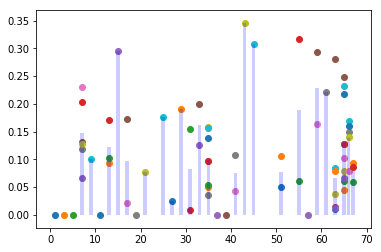

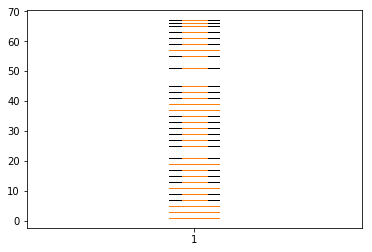

In [24]:
#plot mean distances between foodspots for each fly 
plt.bar(fly_index_appended, mean_distances_appended, color = 'blue', alpha = .2)
for fly in range(len(distances_between_foodspots_appended)):
    
    for i in range(len(distances_between_foodspots_appended[fly])):
        plt.scatter(fly_index_appended[fly], distances_between_foodspots_appended[fly][i])
plt.show()


for fly in range(len(distances_between_foodspots_appended)):
    for i in range(len(distances_between_foodspots_appended[fly])):
        plt.boxplot(fly_index_appended[fly], distances_between_foodspots_appended[fly][i])
plt.show()


[0.07165087705483113, 0.008900362035139674, 0.016040567358521194, 0.13547018186886078, 0.023366723579155167, 0.03835119775761292, 0.1411785654429914, 0.1292783902362125, 0.1442103364996694, 0.01752690186549748, 0.028718640549718517, 0.04678855266104364, 0.06508376069174966, 0.20262608649733047, 0.07532456295448023, 0.17198095234809327, 0.14167948389938861, 0.10706586116500437, 0.06492190826055409, 0.06307748532225478, 0.07383977960315548, 0.07025051376069597, 0.032124787919361394, 0.11781489519997346, 0.049530678678249784, 0.2077440733361481, 0.08522179315734757, 0.14824360178854892, 0.3284159022342053, 0.22284830881312284, 0.03185045032848994]
31
31
[0.11859737354039851, 0.000795563378038211, 0.001381465678758631, 0.3129939610215914, 0.024153063550300446, 0.1101329550297192, 0.24820111988357046, 0.3180709574345105, 0.36331532840452435, 0.05256876780530856, 0.051233819027399485, 0.05281954020318119, 0.17307389858003175, 0.3731100285538582, 0.11017078874203134, 0.13263294016256194, 0.19

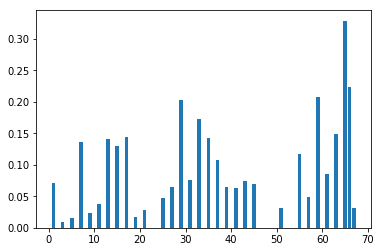

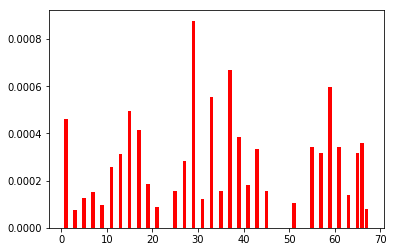

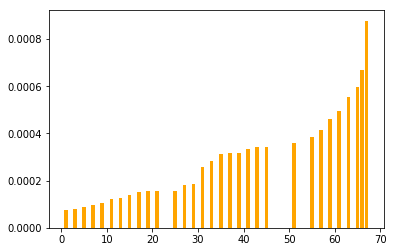

In [28]:
##total area travelled (calculated as rectangle around furthest points in each direction)

rectangle_area_appended = []
appended_max_x = []
appended_max_y = []
appended_min_x = []
appended_min_y = []

flies = [Fly(trial, sigma=3) for trial in trials]
for fly_index in range(len(flies)):
    if flies[fly_index].x is not None:
        #euclidian distances from center and find max

        #have the distances be adjusted so the first position = 0,0
        adj_x_positions = np.array(flies[fly_index].x) - flies[fly_index].x[0]
        adj_y_positions = np.array(flies[fly_index].y) - flies[fly_index].y[0]

        #find the max and min x and y positions to use as rectangle points
        max_x = np.max(adj_x_positions)
        max_y = np.max(adj_y_positions)
        min_x = np.min(adj_x_positions)
        min_y = np.min(adj_y_positions)

        appended_max_x.append(max_x)
        appended_max_y.append(max_y)
        appended_min_x.append(min_x)
        appended_min_y.append(min_y)

        #calculate the area of the rectangle
        length = abs(max_x - min_x)
        height = abs(max_y - min_y)
        rectangle_area = length * height

        rectangle_area_appended.append(rectangle_area)
print(rectangle_area_appended)
print(len(rectangle_area_appended))
print(len(fly_index_appended))
print(appended_max_x)

areaPath = SavePath + "/area/"
if os.path.exists(areaPath):
    print('folder there')
else:
    os.makedirs(areaPath)


# np.savetxt(os.path.join(areaPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'rectangular_area_somewithoutfoodspots.csv'), rectangle_area_appended)

plt.bar(fly_index_appended, rectangle_area_appended)
normalized_area = np.array(rectangle_area_appended)/np.array(appended_total_durations)
plt.show()
plt.bar(fly_index_appended, normalized_area, color = 'red')
plt.show()

sorted_normalized = np.sort(normalized_area)
plt.bar(fly_index_appended, sorted_normalized, color = 'orange')
plt.show()

[0.056274467244680736, 0.006990327995971075, 0.012598232143235605, 0.10639803203492154, 0.018352181783684317, 0.03012096028292152, 0.1108813860100119, 0.1015350102584999, 0.11326253342976834, 0.013765596535209031, 0.02255556754302041, 0.03674764332800847, 0.05111666611429922, 0.15914215619141583, 0.059159773403164244, 0.13507352411353651, 0.11127480644567818, 0.08408933072156062, 0.05098954751209681, 0.049540941123828404, 0.057993627285990675, 0.05517462448537778, 0.025230749431398976, 0.092531602310922, 0.03890130406572654, 0.16316181365491553, 0.06693303982721802, 0.116430252580149, 0.25793724644526084, 0.17502465245805407, 0.025015285191377655]
folder there


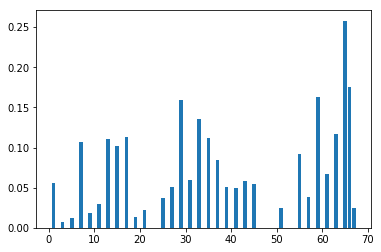

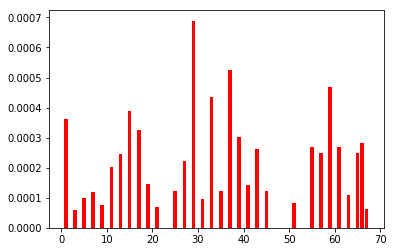

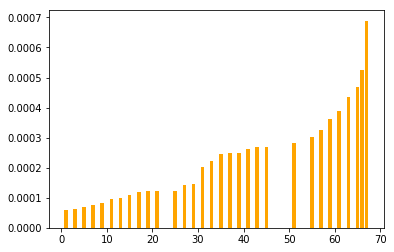

In [27]:
##total area travelled (calculated as an ellipse around furthest points in each direction--not diagonal)

ellipse_area_appended = []
flies = [Fly(trial, sigma=3) for trial in trials]
for fly_index in range(len(flies)):  
    if flies[fly_index].x is not None:
        #euclidian distances from center and find max

        #have the distances be adjusted so the first position = 0,0
        adj_x_positions = np.array(flies[fly_index].x) - flies[fly_index].x[0]
        adj_y_positions = np.array(flies[fly_index].y) - flies[fly_index].y[0]

        #find the max and min x and y positions to use as rectangle points
        max_x = np.max(adj_x_positions)
        max_y = np.max(adj_y_positions)
        min_x = np.min(adj_x_positions)
        min_y = np.min(adj_y_positions)

        #calculate the area of the ellipse (untilted)
        length = abs(max_x - min_x)
        height = abs(max_y - min_y)
        x_radius = length/2
        y_radius = height/2
        ellipse_area = math.pi * x_radius * y_radius

        ellipse_area_appended.append(ellipse_area)
print(ellipse_area_appended)

areaPath = SavePath + "/area/"
if os.path.exists(areaPath):
    print('folder there')
else:
    os.makedirs(areaPath)


# np.savetxt(os.path.join(areaPath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'ellipse_area.csv'), rectangle_area_appended)

plt.bar(fly_index_appended, ellipse_area_appended)
normalized_area = np.array(ellipse_area_appended)/np.array(appended_total_durations)
plt.show()
plt.bar(fly_index_appended, normalized_area, color = 'red')
plt.show()

sorted_normalized = np.sort(normalized_area)
plt.bar(fly_index_appended, sorted_normalized, color = 'orange')
plt.show()

In [15]:
# Schmitt trigger logic (from Roman-Dickinson lab)
# revisit_near is the inner distance threshold
# revisit_away is the outer distance threshold
# stimX & stimY is the fictive food location
# x & y are the arrays of fly positions


def count_revisits(stimX,stimY,x,y):
    
    # get all radial values
    radials=np.zeros(len(x))
    for i in range(len(x)):
        posx=x[i]
        posy=y[i]
        # find radial distance
        x_dist=posx-stimX
        y_dist=posy-stimY
        dist = np.array([x_dist, y_dist])
        radials[i] = np.hypot(x_dist, y_dist)
        
    # get each leave and return
    revisit_away = .01 #how far away it needs to get
    revisit_near = .005 #how close it needs to get
    starts = []
    ends = []
    near_state = True # if fly is on food
    away_state = False # if fly has walked away from food
    revisits=0
    for i in range(len(radials)):
        r=radials[i]
        if away_state==False:
            if r>revisit_away:
                starts.append(i)
                away_state=True
                near_state=False
        elif near_state==False:
            if r<revisit_near:
                ends.append(i)
                near_state=True
                away_state=False
    if len(starts)>len(ends):
        starts.pop()
    revisits=len(starts)
    return revisits

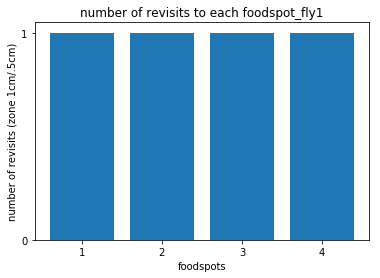

In [159]:
##PLOT REVISITS #######



# flies = [Fly(trial, sigma=3) for trial in trials]
# for fly in flies: 
#     #print(len(fly.optofoodx))
#     #print(fly.optofoodx)

flies = [Fly(trial, sigma=3) for trial in trials]
revisits = []
for fly in flies: 
    revisits_each_fly = []
    for i in range(len(fly.optofoodx)):
        revisits_each_fly.append(count_revisits(fly.optofoodx[i],fly.optofoody[i],fly.x,fly.y))
    revisits.append(revisits_each_fly)
#print(revisits)

foodspot_locations = []
for fly in flies:
    foodspot_locations = fly.optofoodx - fly.x[0]
    #print(fly.optofoodx)
#print(foodspot_locations*100)


# print(len(revisits))
# #print('test', len(revisits[4]))
# for i in range(len(revisits)):
#     if len(revisits[i]) > 0:
#         #print(i)

for i in range(len(revisits)):
    if len(revisits[i]) >0:
        plt.title('number of revisits to each foodspot' + '_fly' + str(i+1))
        plt.xlabel('foodspots')
        plt.ylabel('number of revisits (zone 1cm/.5cm)')

        plt.yticks(range(0, max(revisits[i])+1))
        plt.xticks(range(1, len(revisits[i])+1))

        #plt.xlim(0, len(revisits[i]), 1)
        plt.bar(range(1, len(revisits[i])+1), revisits[i])
#         plt.savefig(os.path.join(SavePath, str(experiment) + '_' + str(genotype)+ '_' + str(condition) + 'fly ' + str(i+1) + '_REVISITS.png'))
        plt.show()

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000000e+00  3.20000000e+00  3.30000000e+00
  3.40000000e+00  3.50000000e+00  3.60000000e+00  3.70000000e+00
  3.80000000e+00  3.90000000e+00  4.00000000e+00  4.10000000e+00
  4.20000000e+00  4.30000000e+00  4.40000000e+00  4.50000000e+00
  4.60000000e+00  4.70000000e+00  4.80000000e+00  4.90000000e+00
  5.00000000e+00  5.10000

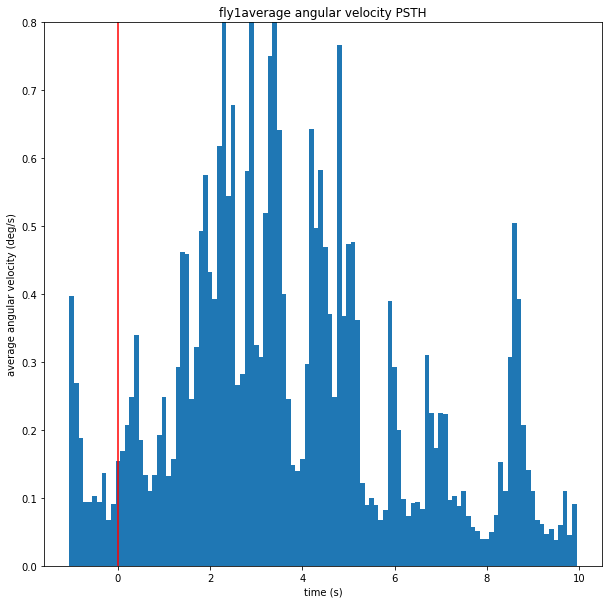

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000000e+00  3.20000000e+00  3.30000000e+00
  3.40000000e+00  3.50000000e+00  3.60000000e+00  3.70000000e+00
  3.80000000e+00  3.90000000e+00  4.00000000e+00  4.10000000e+00
  4.20000000e+00  4.30000000e+00  4.40000000e+00  4.50000000e+00
  4.60000000e+00  4.70000000e+00  4.80000000e+00  4.90000000e+00
  5.00000000e+00  5.10000

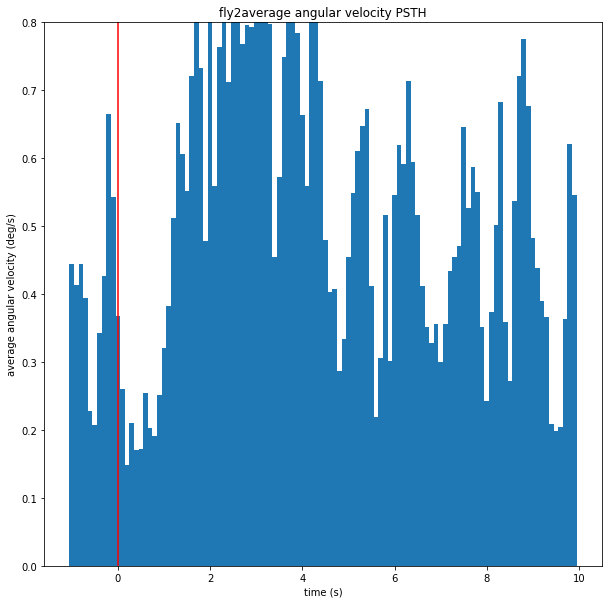

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000000e+00  3.20000000e+00  3.30000000e+00
  3.40000000e+00  3.50000000e+00  3.60000000e+00  3.70000000e+00
  3.80000000e+00  3.90000000e+00  4.00000000e+00  4.10000000e+00
  4.20000000e+00  4.30000000e+00  4.40000000e+00  4.50000000e+00
  4.60000000e+00  4.70000000e+00  4.80000000e+00  4.90000000e+00
  5.00000000e+00  5.10000

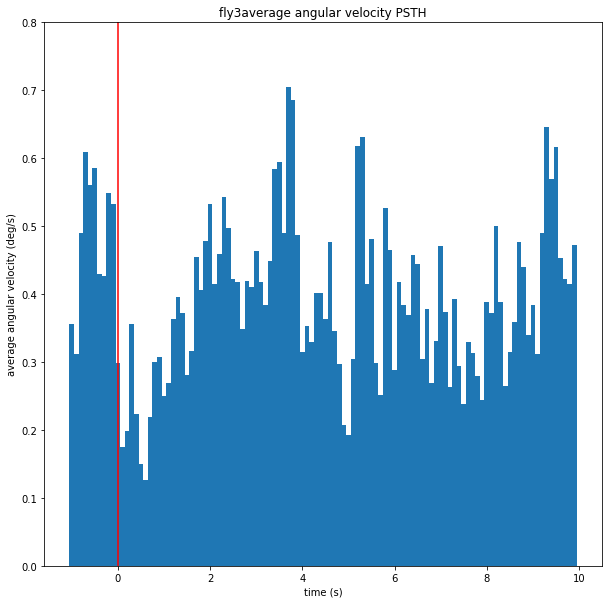

In [9]:
#plot angular velocity vs. time light goes on
#PSTH

flies = [Fly(trial, sigma=3) for trial in trials]
#flies = [Fly(trial, sigma=3) for trial in trials][1:]  #to get rid of super long first fly in wt


fly_index = 0
for fly in flies:
    fly_index = fly_index + 1 
#     print(fly.optot)
#     print(fly.optoON)
    #print(fly.optostatus)
    fly.velocity()
    angular_velocity = fly.av
    times = fly.t
    #print(angular_velocity)
    
    #time doesn't start at 0 so adjust
    adjusted_time = []
    for time in range(len(fly.t)):
        each_adjusted_time = []
        each_adjusted_time = fly.t[time]-fly.t[0]
        adjusted_time.append(each_adjusted_time)
    adjusted_optoON = []
    for time in range(len(fly.optoON)):
        each_adjusted_time = []
        each_adjusted_time = fly.optoON[time] - fly.t[0]
        adjusted_optoON.append(each_adjusted_time)

    #make PSTH
    #split data subtract time of light on from times of velocity if more than time of light on
    #do it after the first light pulse
    #need to keep track of velocity and time together
        #have it collect a list of indices that i can use to plot the right velocities?
    #make sure only collect from region where data is-opto keeps going
        #max(ajdusted_time[:-2] is the max time)
        #if i set it up to look throuhg data times then it should be fine
    
    #have two things--time after light goes on and velocity value
        #could do just movement > threshold vs. time after stim
        #could do average abs velcoity for time between stims or within 3s of stim
        
    #take -1 to 10s where 0 is the light goes on and calculate the average angualr velocity for each .1s bin
    #np.linspace to make bins
    #np.where to find indices
    bin_size = .1
    bins = np.arange(-1.0,10.0,bin_size)
    print(bins)
    
    bin_values = np.zeros_like(bins)
    bin_counts = np.zeros_like(bin_values)
    for bin_index, this_bin in enumerate(bins):
        for this_light_on in adjusted_optoON:
            this_min = this_bin + this_light_on
            this_max = this_bin + this_light_on + bin_size
            av_timestamp_indices = np.where(np.logical_and(adjusted_time[:-2] >= this_min,
                                                           adjusted_time[:-2] < this_max))[0]
            if av_timestamp_indices.size > 0:
                av_values = abs(angular_velocity[av_timestamp_indices])
                #print(av_values)
                bin_value = np.mean(av_values) # or np.median
                if np.isnan(bin_value):
                    print("nan",av_values, av_timestamp_indices)
                #print(bin_value)
                bin_values[bin_index] += bin_value
                bin_counts[bin_index] += 1
                
    bin_averages = bin_values / bin_counts
    #plt.plot(bin_averages)
    fig1 = plt.figure(figsize=(10, 10))
    plt.bar(bins, bin_averages, width=0.1)  #larger 0.4
    plt.axvline(x=0, color = 'red')
    plt.ylim(0,.8)
    plt.xlabel('time (s)')
    plt.ylabel('average angular velocity (deg/s)')
    plt.title('fly' + str(fly_index) + 'average angular velocity PSTH')
#     plt.savefig(os.path.join(SavePath, 'PSTH_angular_velocity_flyYLIM-100msbin'+str(fly_index) + '_' + str(genotype)+ '_' + '.png'))
    plt.show()

                
        
        

    #plt.hist(data, bins)
    
    
#     #plt.plot(fly.t[:-2], fly.av)
#     fig1 = plt.figure(figsize=(10, 10))
#     plt.plot(adjusted_time[:-2], fly.av)
#     #plot times light on as vertical bars
#     for i in range(len(adjusted_optoON)):
#         plt.axvline(x=adjusted_optoON[i], color = 'red')
#     plt.title('fly' + str(fly_index) + 'relative time')
#     plt.xlim(0, max(adjusted_time[:-2]))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_relativeTime_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.png'))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_relativeTime_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.svg'))
#     plt.show()
        
    
#     fig2 = plt.figure(figsize=(10, 10))
#     ##un-adjusted
#     plt.plot(fly.t[:-2], fly.av)
#     #plot times light on as vertical bars
#     for i in range(len(fly.optoON)):
#         plt.axvline(x=fly.optoON[i], color = 'red')
#     plt.title('fly' + str(fly_index) + 'absolute time')
#     plt.xlim(min(fly.t[:-2]), max(fly.t[:-2]))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.png'))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.svg'))
#     plt.show()
    
    #plt.scatter(adjusted_optoON, [0]*len(adjusted_optoON))


# control_average_angular_velocity = []
# control_total_angular_velocity = []
# control_all_fly_velocity = []
# for fly in fliesControl:
#     control_single_velocity = []
#     fly.velocity()
#     control_single_velocity_sum = sum(abs(fly.av))#I think I need the absolute value because can have negative velocity and I don't care
#     control_time_in_arena_by_fly = max(fly.t)-min(fly.t)
#     print('time', control_time_in_arena_by_fly)
#     control_ang_veloc_by_time_by_fly = control_single_velocity_sum/control_time_in_arena_by_fly
#     control_all_fly_velocity.append(control_ang_veloc_by_time_by_fly)
    
# control_total_flies = len(flies)
# control_total_angular_velocity = sum(control_all_fly_velocity)
# control_average_angular_velocity = control_total_angular_velocity/control_total_flies 


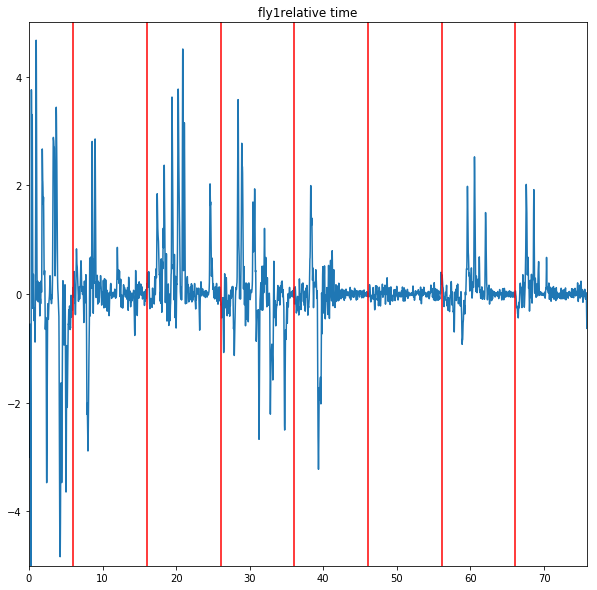

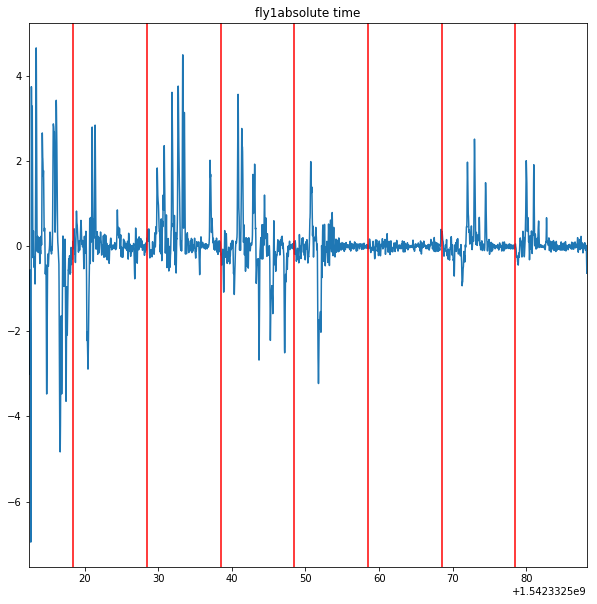

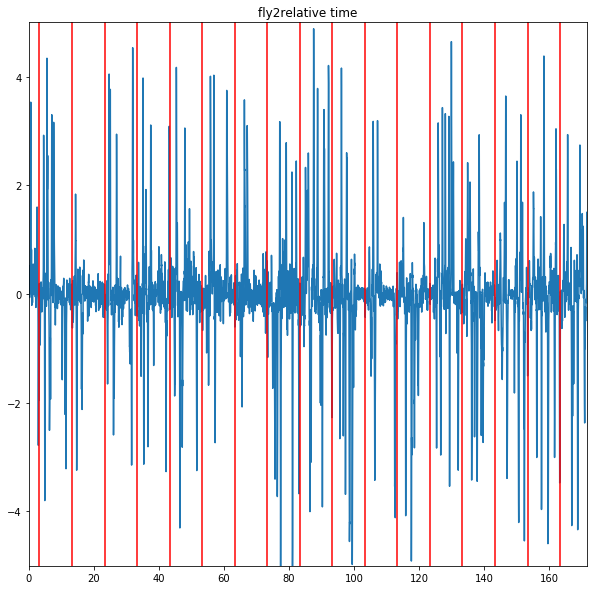

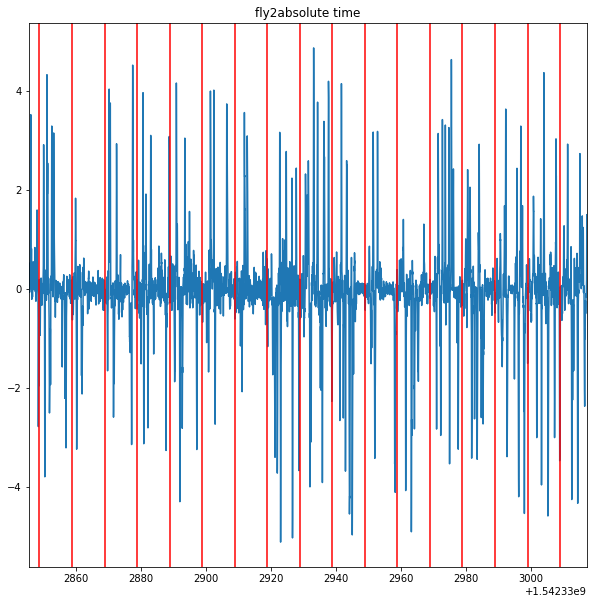

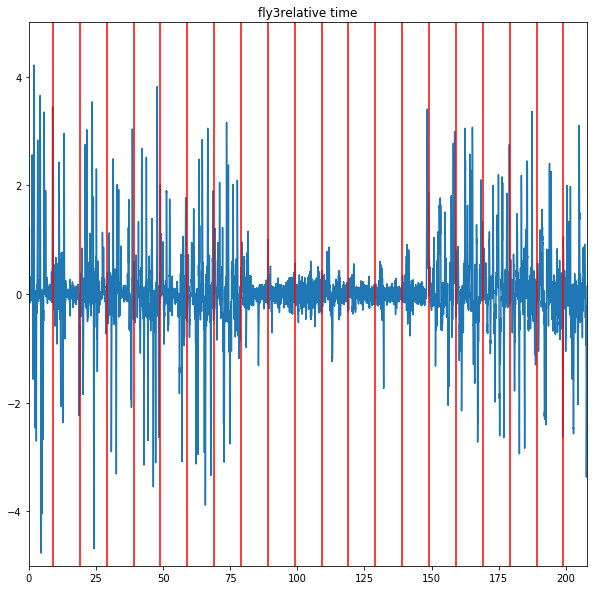

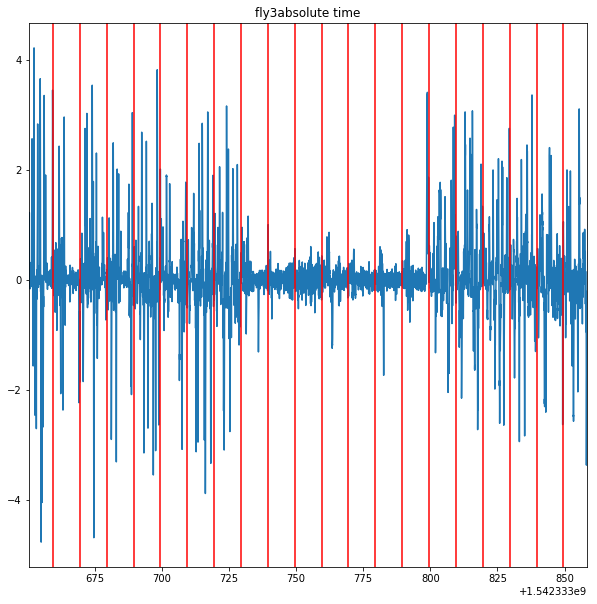

In [6]:
#plot angular velocity vs. time light goes on

flies = [Fly(trial, sigma=3) for trial in trials]
#flies = [Fly(trial, sigma=3) for trial in trials][1:]  #to get rid of super long first fly in wt


fly_index = 0
for fly in flies:
    fly_index = fly_index + 1 
#     print(fly.optot)
#     print(fly.optoON)
    #print(fly.optostatus)
    fly.velocity()
    angular_velocity = fly.av
    times = fly.t
    #print(angular_velocity)
    adjusted_time = []
    for time in range(len(fly.t)):
        each_adjusted_time = []
        each_adjusted_time = fly.t[time]-fly.t[0]
        adjusted_time.append(each_adjusted_time)
    adjusted_optoON = []
    for time in range(len(fly.optoON)):
        each_adjusted_time = []
        each_adjusted_time = fly.optoON[time] - fly.t[0]
        adjusted_optoON.append(each_adjusted_time)

    
    
    #plt.plot(fly.t[:-2], fly.av)
    fig1 = plt.figure(figsize=(10, 10))
    plt.plot(adjusted_time[:-2], fly.av)
    #plot times light on as vertical bars
    for i in range(len(adjusted_optoON)):
        plt.axvline(x=adjusted_optoON[i], color = 'red')
    plt.title('fly' + str(fly_index) + 'relative time')
    plt.xlim(0, max(adjusted_time[:-2]))
    plt.ylim(-5,5)
    plt.savefig(os.path.join(SavePath, 'angular_velocity_relativeTimeYlim_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.png'))
    plt.savefig(os.path.join(SavePath, 'angular_velocity_relativeTimeYlim_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.svg'))
    plt.show()
        
    
#     fig2 = plt.figure(figsize=(10, 10))
#     ##un-adjusted
#     plt.plot(fly.t[:-2], fly.av)
#     #plot times light on as vertical bars
#     for i in range(len(fly.optoON)):
#         plt.axvline(x=fly.optoON[i], color = 'red')
#     plt.title('fly' + str(fly_index) + 'absolute time')
#     plt.xlim(min(fly.t[:-2]), max(fly.t[:-2]))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.png'))
#     plt.savefig(os.path.join(SavePath, 'angular_velocity_fly'+str(fly_index) + '_' + str(genotype)+ '_' + '.svg'))
#     plt.show()
    
    
    
    
    
    
    #plt.scatter(adjusted_optoON, [0]*len(adjusted_optoON))


# control_average_angular_velocity = []
# control_total_angular_velocity = []
# control_all_fly_velocity = []
# for fly in fliesControl:
#     control_single_velocity = []
#     fly.velocity()
#     control_single_velocity_sum = sum(abs(fly.av))#I think I need the absolute value because can have negative velocity and I don't care
#     control_time_in_arena_by_fly = max(fly.t)-min(fly.t)
#     print('time', control_time_in_arena_by_fly)
#     control_ang_veloc_by_time_by_fly = control_single_velocity_sum/control_time_in_arena_by_fly
#     control_all_fly_velocity.append(control_ang_veloc_by_time_by_fly)
    
# control_total_flies = len(flies)
# control_total_angular_velocity = sum(control_all_fly_velocity)
# control_average_angular_velocity = control_total_angular_velocity/control_total_flies 


#Fly arrow plots (Very slow to run)